In [17]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import mlrose_hiive as mlrose
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

# Pretty display for notebooks
%matplotlib inline

In [18]:
data = pd.read_csv("..\Datasets\water\water_potability.csv")

In [19]:
display(data.head(n=10))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [20]:
print(data.isna().sum().sum())
print(data.isnull().sum())
print(data.shape)

1434
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
(3276, 10)


In [21]:
data = data.fillna(data.mean())
#data = data.dropna()
display(data.head(n=10))
print(data.isna().sum().sum())
print(data.isnull().sum())
print(data.shape)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
(3276, 10)


In [22]:
print(data.describe())
print(data["Potability"].unique())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  


In [24]:
output = data[['Potability']]
features = data.drop(columns='Potability')


In [25]:
# Import train_test_split
# Split into training, validation and testing.
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, output, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2620 samples.
Testing set has 656 samples.


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2096 samples.
Validation set has 524 samples.
Testing set has 656 samples.


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # default=(0, 1)
# Do scaling on training. Apply the same transformation to validation and testing.
X_train_np = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(data=X_train_np,columns=X_train.columns)
X_val_np = scaler.transform(X_val)
X_val_std = pd.DataFrame(data=X_val_np,columns=X_train.columns)
X_test_np = scaler.transform(X_test)
X_test_std = pd.DataFrame(data=X_test_np,columns=X_train.columns)


In [50]:
RHCdat = {}
RHCdat["time"] = {}
RHCdat["ftrain"] = {}
RHCdat["fval"] = {}
RHCdat["ftest"] = {}
for i,var in enumerate(range(2,8,2)):
    print(i,var)
    start = time()
    RHC = mlrose.NeuralNetwork(hidden_nodes = [15], activation = 'tanh', \
                                     algorithm = 'random_hill_climb', max_iters = 10000, \
                                     bias = True, is_classifier = True, learning_rate = 0.0001, \
                                     early_stopping = True, clip_max = 5, max_attempts = 100, \
                                     random_state = 42, restarts = var)
    RHC.fit(X_train_std, y_train)
    end = time()
    RHCdat["time"][i] = end - start
    predictions_train = RHC.predict(X_train_std)
    predictions_val = RHC.predict(X_val_std)
    predictions_test = RHC.predict(X_test_std)
    RHCdat["ftrain"][i] = fbeta_score(y_train,predictions_train,beta=1.)
    RHCdat["fval"][i] = fbeta_score(y_val,predictions_val,beta=1.)
    RHCdat["ftest"][i] = fbeta_score(y_test,predictions_test,beta=1.)




0 2
1 4
2 6


In [52]:
RHCdat

{'time': {0: 98.00209450721741, 1: 178.41737985610962, 2: 241.55893540382385},
 'ftrain': {0: 0.44639912039582186,
  1: 0.4472527472527473,
  2: 0.4472527472527473},
 'fval': {0: 0.42217484008528783,
  1: 0.42217484008528783,
  2: 0.42217484008528783},
 'ftest': {0: 0.4381625441696113,
  1: 0.4381625441696113,
  2: 0.4381625441696113}}

In [60]:
SAdat = {}
SAdat["time"] = {}
SAdat["ftrain"] = {}
SAdat["fval"] = {}
SAdat["ftest"] = {}
l = [mlrose.GeomDecay(),mlrose.ArithDecay(),mlrose.ExpDecay()]
for i,var in enumerate(l):
    print(i,var)
    start = time()
    SA = mlrose.NeuralNetwork(hidden_nodes = [15], activation = 'tanh', \
                                 algorithm = 'simulated_annealing', max_iters = 10000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 42, schedule = var)
    print(SA)
    SA.fit(X_train_std, y_train)
    end = time()
    SAdat["time"][i] = end - start
    predictions_train = SA.predict(X_train_std)
    predictions_val = SA.predict(X_val_std)
    predictions_test = SA.predict(X_test_std)
    print(fbeta_score(y_train,predictions_train,beta=1.))
    print(fbeta_score(y_val,predictions_val,beta=1.))
    print(fbeta_score(y_test,predictions_test,beta=1.))
    SAdat["ftrain"][i] = fbeta_score(y_train,predictions_train,beta=1.)
    SAdat["fval"][i] = fbeta_score(y_val,predictions_val,beta=1.)
    SAdat["ftest"][i] = fbeta_score(y_test,predictions_test,beta=1.)

0 1.0
NeuralNetwork(activation='tanh', algorithm='simulated_annealing', clip_max=5,
              early_stopping=True, hidden_nodes=[15], learning_rate=0.0001,
              max_attempts=100, max_iters=10000, random_state=42)
0.4515068493150685
0.42217484008528783
0.44133099824868655
1 1.0
NeuralNetwork(activation='tanh', algorithm='simulated_annealing', clip_max=5,
              early_stopping=True, hidden_nodes=[15], learning_rate=0.0001,
              max_attempts=100, max_iters=10000, random_state=42,
              schedule=ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001))
0.4515068493150685
0.42217484008528783
0.44133099824868655
2 1.0
NeuralNetwork(activation='tanh', algorithm='simulated_annealing', clip_max=5,
              early_stopping=True, hidden_nodes=[15], learning_rate=0.0001,
              max_attempts=100, max_iters=10000, random_state=42,
              schedule=ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001))
0.4515068493150685
0.42217484008528783
0.44

In [61]:
SAdat

{'time': {0: 40.96141815185547, 1: 44.3692786693573, 2: 47.736982107162476},
 'ftrain': {0: 0.4515068493150685,
  1: 0.4515068493150685,
  2: 0.4515068493150685},
 'fval': {0: 0.42217484008528783,
  1: 0.42217484008528783,
  2: 0.42217484008528783},
 'ftest': {0: 0.44133099824868655,
  1: 0.44133099824868655,
  2: 0.44133099824868655}}

In [62]:
GAdat = {}
GAdat["time"] = {}
GAdat["ftrain"] = {}
GAdat["fval"] = {}
GAdat["ftest"] = {}
for i,var in enumerate(range(100,400,100)):
    print(i,var)
    start = time()
    GA = mlrose.NeuralNetwork(hidden_nodes = [15], activation = 'tanh', \
                                     algorithm = 'genetic_alg', max_iters = 10000, \
                                     bias = True, is_classifier = True, learning_rate = 0.0001, \
                                     early_stopping = True, clip_max = 5, max_attempts = 100, \
                                     random_state = 42, pop_size = var)
    GA.fit(X_train_std, y_train)
    end = time()
    GAdat["time"][i] = end - start
    predictions_train = GA.predict(X_train_std)
    predictions_val = GA.predict(X_val_std)
    predictions_test = GA.predict(X_test_std)
    GAdat["ftrain"][i] = fbeta_score(y_train,predictions_train,beta=1.)
    GAdat["fval"][i] = fbeta_score(y_val,predictions_val,beta=1.)
    GAdat["ftest"][i] = fbeta_score(y_test,predictions_test,beta=1.)

0 100
1 200
2 300


In [63]:
GAdat

{'time': {0: 183.71149158477783, 1: 133.0687654018402, 2: 726.0666046142578},
 'ftrain': {0: 0.28936170212765955,
  1: 0.33486943164362515,
  2: 0.30730478589420657},
 'fval': {0: 0.271523178807947,
  1: 0.33333333333333337,
  2: 0.30817610062893086},
 'ftest': {0: 0.2865497076023392,
  1: 0.3267326732673267,
  2: 0.2464183381088825}}

In [66]:
GDdat = {}
start = time()
GD = mlrose.NeuralNetwork(hidden_nodes = [15], activation = 'tanh', \
                                 algorithm = 'gradient_descent', max_iters = 10000, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 42)
GD.fit(X_train_std, y_train)
end = time()
GDdat["time"] = end - start


In [115]:
predictions_train = GD.predict(X_train_std)
predictions_val = GD.predict(X_val_std)
predictions_test = GD.predict(X_test_std)
print(fbeta_score(y_train,predictions_train,beta=1.))
print(fbeta_score(y_val,predictions_val,beta=1.))
print(fbeta_score(y_test,predictions_test,beta=1.))
GDdat["ftrain"] = fbeta_score(y_train,predictions_train,beta=1.)
GDdat["fval"] = fbeta_score(y_val,predictions_val,beta=1.)
GDdat["ftest"] = fbeta_score(y_test,predictions_test,beta=1.)

0.5625441696113075
0.508108108108108
0.4543325526932084


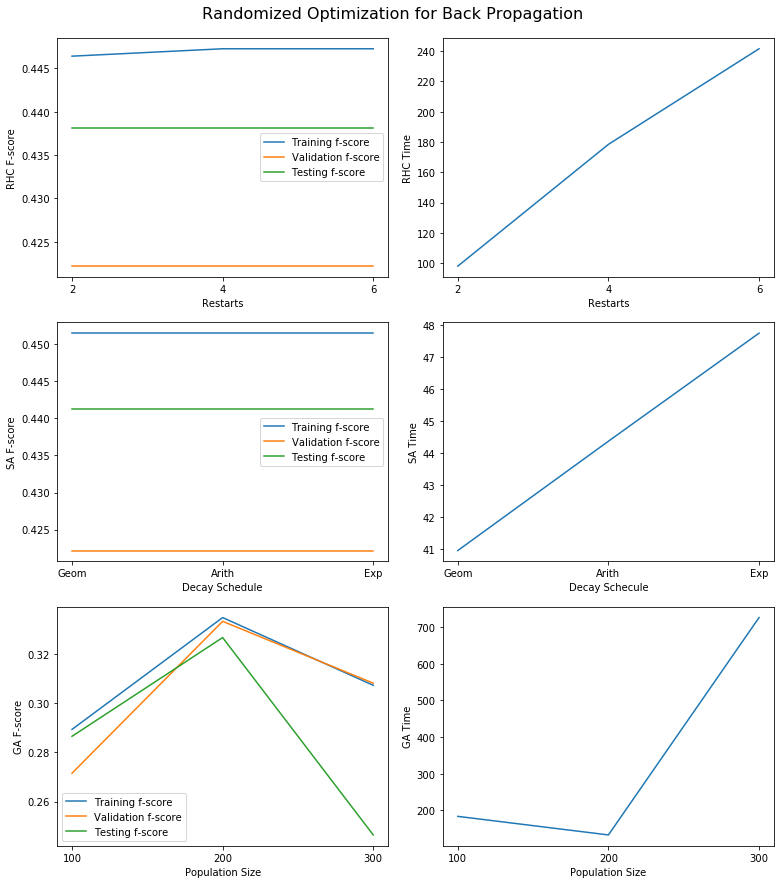

In [123]:
fig, ax = pl.subplots(nrows = 3, ncols = 2, figsize = (11,12))
ax[0, 0].plot([2,4,6],RHCdat["ftrain"].values(), label = "Training f-score")
ax[0, 0].plot([2,4,6],RHCdat["fval"].values(), label = "Validation f-score")
ax[0, 0].plot([2,4,6],RHCdat["ftest"].values(), label = "Testing f-score")
ax[0, 0].set_xlabel("Restarts")
ax[0, 0].set_ylabel("RHC F-score")
ax[0, 0].legend()
ax[0, 0].set_xticks([2,4,6])

ax[0, 1].plot([2,4,6],RHCdat["time"].values())
ax[0, 1].set_xlabel("Restarts")
ax[0, 1].set_ylabel("RHC Time")
ax[0, 1].set_xticks([2,4,6])

ax[1, 0].plot(["Geom","Arith","Exp"],SAdat["ftrain"].values(), label = "Training f-score")
ax[1, 0].plot(["Geom","Arith","Exp"],SAdat["fval"].values(), label = "Validation f-score")
ax[1, 0].plot(["Geom","Arith","Exp"],SAdat["ftest"].values(), label = "Testing f-score")
ax[1, 0].set_xlabel("Decay Schedule")
ax[1, 0].set_ylabel("SA F-score")
ax[1, 0].legend()

ax[1, 1].plot(["Geom","Arith","Exp"],SAdat["time"].values())
ax[1, 1].set_xlabel("Decay Schecule")
ax[1, 1].set_ylabel("SA Time")


ax[2, 0].plot([100,200,300],GAdat["ftrain"].values(), label = "Training f-score")
ax[2, 0].plot([100,200,300],GAdat["fval"].values(), label = "Validation f-score")
ax[2, 0].plot([100,200,300],GAdat["ftest"].values(), label = "Testing f-score")
ax[2, 0].set_xlabel("Population Size")
ax[2, 0].set_ylabel("GA F-score")
ax[2, 0].legend()
ax[2, 0].set_xticks([100,200,300])

ax[2, 1].plot([100,200,300],GAdat["time"].values())
ax[2, 1].set_xlabel("Population Size")
ax[2, 1].set_ylabel("GA Time")
ax[2, 1].set_xticks([100,200,300])


pl.suptitle("Randomized Optimization for Back Propagation", fontsize = 16, x = 0.5, y = 1.02)
pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

Text(0, 0.5, 'Computational Time')

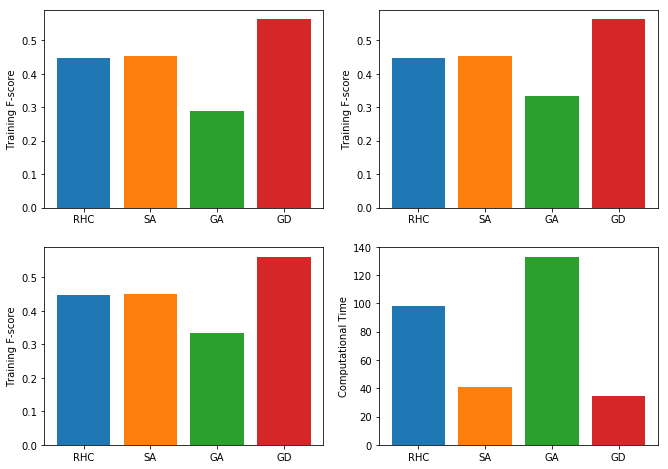

In [121]:
fig, ax = pl.subplots(nrows = 2, ncols = 2, figsize = (11,8))
ax[0,0].bar('RHC', RHCdat["ftrain"][0], label = 'RHC')
ax[0,0].bar('SA', SAdat["ftrain"][0], label = 'SA')
ax[0,0].bar('GA', GAdat["ftrain"][0], label = 'GA')
ax[0,0].bar('GD', GDdat["ftrain"], label = 'GD')
ax[0,0].set_xticks(['RHC','SA','GA','GD'])
ax[0,0].set_ylabel("Training F-score")
#ax[0].legend()

ax[0,1].bar('RHC', RHCdat["ftrain"][0], label = 'RHC')
ax[0,1].bar('SA', SAdat["ftrain"][0], label = 'SA')
ax[0,1].bar('GA', GAdat["ftrain"][1], label = 'GA')
ax[0,1].bar('GD', GDdat["ftrain"], label = 'GD')
ax[0,1].set_xticks(['RHC','SA','GA','GD'])
ax[0,1].set_ylabel("Training F-score")

ax[1,0].bar('RHC', RHCdat["ftrain"][0], label = 'RHC')
ax[1,0].bar('SA', SAdat["ftrain"][0], label = 'SA')
ax[1,0].bar('GA', GAdat["ftrain"][1], label = 'GA')
ax[1,0].bar('GD', GDdat["ftrain"], label = 'GD')
ax[1,0].set_xticks(['RHC','SA','GA','GD'])
ax[1,0].set_ylabel("Training F-score")

ax[1,1].bar('RHC', RHCdat["time"][0], label = 'RHC')
ax[1,1].bar('SA', SAdat["time"][0], label = 'SA')
ax[1,1].bar('GA', GAdat["time"][1], label = 'GA')
ax[1,1].bar('GD', GDdat["time"], label = 'GD')
ax[1,1].set_xticks(['RHC','SA','GA','GD'])
ax[1,1].set_ylabel("Computational Time")


In [96]:
RHCdat["ftrain"][0]


0.44639912039582186